<a href="https://colab.research.google.com/github/roysuraj115/Letsgrowmore-VIP-/blob/main/day67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/seeds.csv")

In [ ]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [ ]:
x=df.drop(columns="Type")
y=df["Type"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [ ]:
y.unique()

array([1, 2, 3])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
ypred=DT.predict(x_test)
Decision_tree=accuracy_score(y_test,ypred)
print("Accuracy score of the Decission tree model is:\n",Decision_tree)

Accuracy score of the Decission tree model is:
 0.85


In [ ]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
ypred=GNB.predict(x_test)
GaussianNB=accuracy_score(y_test,ypred)
print("Accuracy score of the GaussianNB model is:\n",GaussianNB)

Accuracy score of the GaussianNB model is:
 0.9166666666666666


In [ ]:
# applying adaboost alorithm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.5)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
acc_ada=(accuracy_score(y_test,ada_pred))
print(acc_ada)

0.95


In [ ]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(x_train,y_train)
agnb_pred=ada_gnb.predict(x_test)
acc_agnb=(accuracy_score(y_test,agnb_pred))
print(acc_agnb)

0.9333333333333333


<BarContainer object of 4 artists>

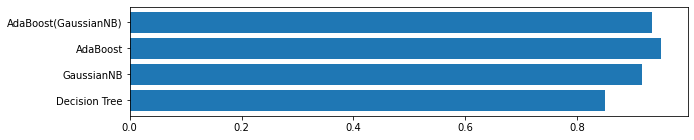

In [ ]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[Decision_tree,GaussianNB,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])
